<div>

<h2>
NLP
</h2>


Dr. Asgari

Sara Azarnoush 

spring 2023

Sharif University of Technology

Department of Computer Engineering

</div>


### Get tweets from Twitter API or prepared dataset and analysis it

First, I get tweets from Twitter API and save them in a CSV file, but Twitter API is not free, so it is better to use a prepared dataset.

Here I use the Kaggle dataset to get tweets and analysis them.("elonmusk.csv" include 12205 tweet with other data about each tweet - "musk-tweets-2010-to-2018.csv" include 6094 tweet)

- Load the data
    - kaggle dataset / crawling Twitter API
    - Read CSV
- Preprocess the data
  - Tokenize the data
  - Normalize the data
  - Lemmatize the data
  - Stem the data
  - Stopwords
  - Rejoin the tokens
- Cloudwords 
    - Most important words and visualize
- Spacy 
    - Names type
- Sklearn CountVectorizer 
    - Matrix of token counts
- Negative and positive tweets, percantage and visualize

<h2> get access to drive for colab </h2>


In [202]:
# from google.colab import drive
# drive.mount('/content/drive')

# address = "mir/elon-musk-tweets"
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(address))

# %cd /content/drive/My\ Drive/$address

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/mir/elon-musk-tweets


<h2> install required libraries for data </h2>


In [203]:
!pip install tweepy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2> import required libraries for data </h2>


In [204]:
import csv
import tweepy


<h2> Twitter API</h2>


In [205]:
consumer_key = ''
consumer_secret = ''
access_key =''
access_secret = ''


<h2>get tweets of specific username </h2>


In [206]:
tweets_number = 100
username = "elonmusk"


In [207]:
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_key, access_secret)
# api = tweepy.API(auth)

# tweets_csv = []
# for tweet in tweepy.Cursor(api.user_timeline, screen_name=username).items(tweets_number):
#     tweets_csv.append([tweet.text.encode("utf-8")])


<h2>get tweets of specific keyword </h2>


In [208]:
# sinceId = None
# max_id = -1
# query = 'elonmusk'
# maxTweets = 1000
# tweetCount = 0
# tweetsPerQry = 100

In [209]:
# tweets_csv = []
# while tweetCount < maxTweets:
#     try:
#         if (max_id <= 0):
#             if (not sinceId):
#                 new_tweets = api.search(q=query, count=tweetsPerQry)
#             else:
#                 new_tweets = api.search(q=query, count=tweetsPerQry,
#                                              since_id=sinceId)
#         else:
#             if (not sinceId):
#                 new_tweets = api.search(q=query, count=tweetsPerQry,
#                                              max_id=str(max_id - 1))
#             else:
#                 new_tweets = api.search(q=query, count=tweetsPerQry,
#                                              max_id=str(max_id - 1),
#                                              since_id=sinceId)
#         if not new_tweets:
#             print("no more tweets")
#             break
#         for tweet in new_tweets:
#             parsed_tweet = {}
#             parsed_tweet['tweets'] = tweet.text
#             if tweet.retweet_count > 0:
#                 if parsed_tweet not in tweets_csv:
#                     tweets_csv.append(parsed_tweet)
#             else:
#                 tweets_csv.append(parsed_tweet)
#         tweetCount += len(new_tweets)
#         max_id = new_tweets[-1].id
#     except tweepy.TweepError as e:
#         print("Tweepy error : " + str(e))
#         break


<h2> write in csv </h2>


In [210]:
# name = './data/' + username + "_tweets.csv"
# with open(name, 'w+') as file:
#     writer = csv.writer(file, delimiter=',')
#     writer.writerows(tweets_csv)


<h2> install required libraries for nlp </h2>


In [211]:
!pip install nltk
!pip install pandas
!pip install wordcloud
!pip install matplotlib
!pip install sklearn
!pip install textblob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2> import required libraries for nlp </h2>


In [212]:
import pandas as pd
import re
import string
import spacy
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob


In [213]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<h2>convert list of tweets to df</h2>


In [214]:
# tweets_df = pd.DataFrame(tweets_csv)

<h2>read csv </h2>

elonmusk.csv is a kaggle dataset from 2010 to 2022, wich contain all elon musks tweets and details.

musk-tweets-2010-to-2018.csv is a kaggle dataset from 2010 to 2018, wich contain all elon musks tweet.



In [215]:
tweets_df = pd.read_csv('data/elonmusk.csv') #larger kaggle dataset (bad text format)
# tweets_df = pd.read_csv('data/musk-tweets-2010-to-2018.csv') #better but smaller dataset

<h2> clean csv </h2>


In [216]:
tweets_df.columns = ["Tweet", "UserScreenName", "UserName", "Timestamp", "text", "Emojis","Comments", "Likes", "Retweets", "Image link", "Tweet URL"] #for elonmusk.csv
tweets_df.drop(columns=["Tweet", "UserScreenName", "UserName", "Timestamp", "Emojis","Comments", "Likes", "Retweets", "Image link", "Tweet URL"], inplace=True) #for elonmusk.csv
# tweets_df.columns = ["text"]
tweets_df.head()


,text
0,"Please ignore prior tweets, as that was someon..."
1,Went to Iceland on Sat to ride bumper cars on ...
2,I made the volume on the Model S http://ow.ly/...
3,"Great Voltaire quote, arguably better than Twa..."
4,That was a total non sequitur btw\n26\n14\n50


In [217]:
original_tweets_df = tweets_df.copy()
len_tweets = len(tweets_df)


<h2> cleaning texts </h2>


In [218]:

tweets = [text.strip() for text in tweets_df.text]
tweets = [text for text in tweets if text]
tweets = [ re.sub(r"((\d+\,*\d*)+\s*)+", "", text)  for text in tweets if text] #for elonmusk.csv
# tweets=[text[2:-1] for text in tweets] #not for kaggle
# print(tweets)


In [219]:
tweets_text = ' '.join(tweets)
# print(tweets_text)

<h2> tokenize tweets</h2>


In [220]:
tweets_token = TweetTokenizer(strip_handles=True).tokenize(tweets_text)
# print(tweets_token)


In [221]:
tweets_tokens_all = ' '.join(tweets_token)
# print(tweets_tokens_all)


<h2> Remove Punctuations  </h2>


In [222]:
no_punctuation = tweets_tokens_all.translate(str.maketrans('', '', string.punctuation))
# print(no_punctuation)


<h2> remove urls </h2>


In [223]:
no_url = re.sub(r'http\S+', '', no_punctuation)
# print(no_url)


<h2> tokenize words</h2>


In [224]:
word_tokeniz = word_tokenize(no_url)
# print(word_tokeniz)


<h2>remove stop words</h2>


In [225]:
stop_words = stopwords.words('english')
stop_words_list = ['\x92', 'yes', 'ye', 'yeah' 'no', 'rt', 'replying', 'reply', 'lol', 'U0001F923']
stop_words.extend(stop_words_list)
no_stop_word = [word for word in word_tokeniz if not word in stop_words_list]
# print(no_stop_word)


<h2> normalize data</h2>


In [226]:
lower_words = [Text.lower() for Text in no_stop_word]
# print(lower_words)


<h2>stemming</h2>


In [227]:
PorterStemme = PorterStemmer()
stemmed_tokens = [PorterStemme.stem(word) for word in lower_words]
# print(stemmed_tokens)


<h2>lemmatization</h2>


In [228]:
nlp = spacy.load('en_core_web_sm')
txt = nlp(' '.join(lower_words[:99999]))
# print(txt)


In [229]:
lemmas = [token.lemma_ for token in txt]
# print(lemmas)


<h2>joining</h2>


In [230]:
clean_tweets = ' '.join(lemmas)
# print(clean_tweets)


<h2>Count Vectorizer</h2>


In [231]:
cv = CountVectorizer()
tweetscv = cv.fit_transform(lemmas)
# print(tweetscv)
print(cv.vocabulary_)
print(cv.get_feature_names_out()[100:200])


{'please': 5357, 'ignore': 3416, 'prior': 5530, 'tweet': 7523, 'as': 418, 'that': 7228, 'be': 616, 'someone': 6644, 'pretend': 5509, 'to': 7350, 'this': 7271, 'actually': 71, 'go': 2977, 'iceland': 3397, 'on': 4973, 'sit': 6522, 'ride': 6043, 'bumper': 912, 'car': 1007, 'ice': 3396, 'no': 4807, 'not': 4857, 'the': 7230, 'country': 1547, 'vlad': 7820, 'rink': 6056, 'in': 3470, 'van': 7733, 'nuy': 4893, 'awesome': 540, 'family': 2525, 'fun': 2833, 'make': 4252, 'volume': 7835, 'model': 4549, 'now': 4867, 'just': 3834, 'need': 4734, 'work': 8044, 'miniature': 4495, 'stonehenge': 6868, 'great': 3037, 'voltaire': 7833, 'quote': 5691, 'arguably': 389, 'well': 7935, 'than': 7223, 'twain': 7520, 'hearing': 3172, 'news': 4771, 'of': 4943, 'his': 3243, 'own': 5121, 'death': 1740, 'reply': 5933, 'report': 5935, 'true': 7481, 'only': 4984, 'premature': 5485, 'total': 7383, 'non': 4815, 'sequitur': 6365, 'btw': 893, 'read': 5764, 'biography': 710, 'ben': 659, 'franklin': 2776, 'by': 945, 'isaacson'

<h2>word cloud</h2>


In [232]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 30))
    plt.imshow(wordcloud)
    plt.axis("off")


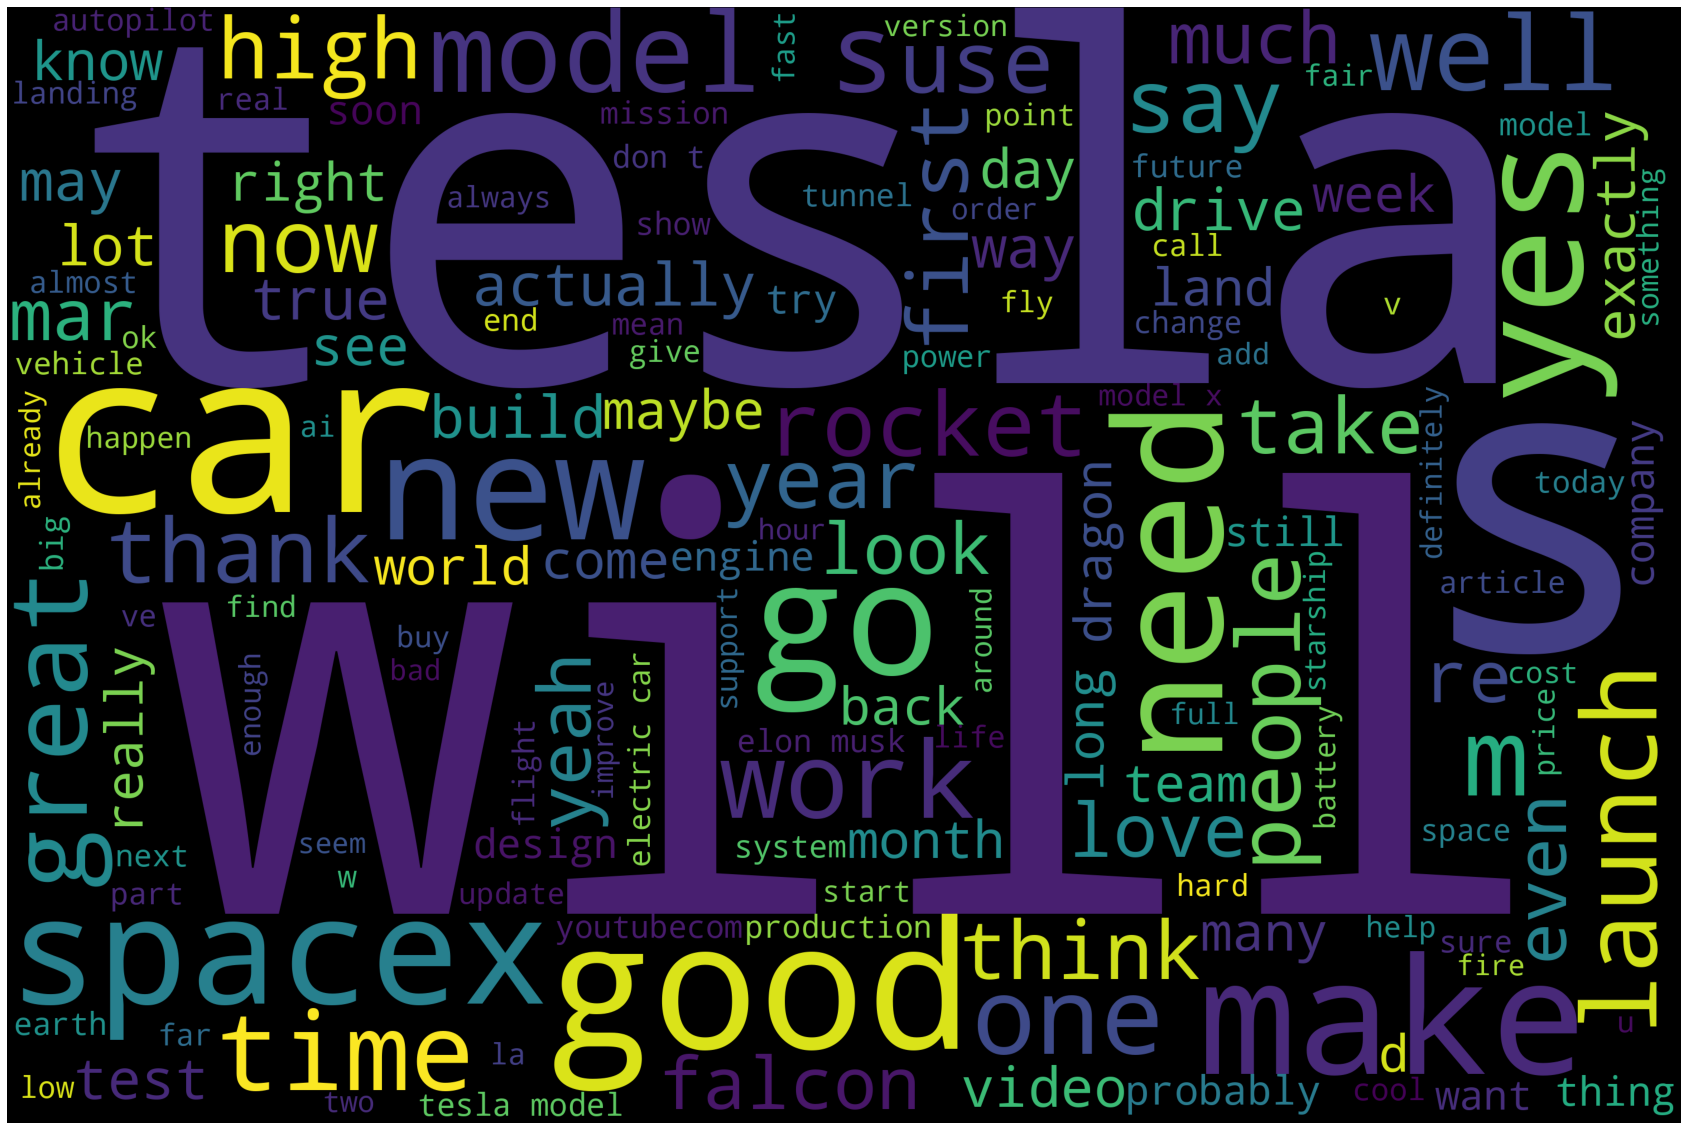

In [233]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('x80')
STOPWORDS.add('xe2')
STOPWORDS.add('xa6')
STOPWORDS.add('replying')
STOPWORDS.add('reply')
wordcloud = WordCloud(width=3000, height=2000, background_color='black',
                      max_words=150, stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)


Without processing data

In [234]:
or_tweets = [text.strip() for text in original_tweets_df.text]
or_tweets = [text for text in or_tweets if text]
or_tweets_text = ' '.join(or_tweets)

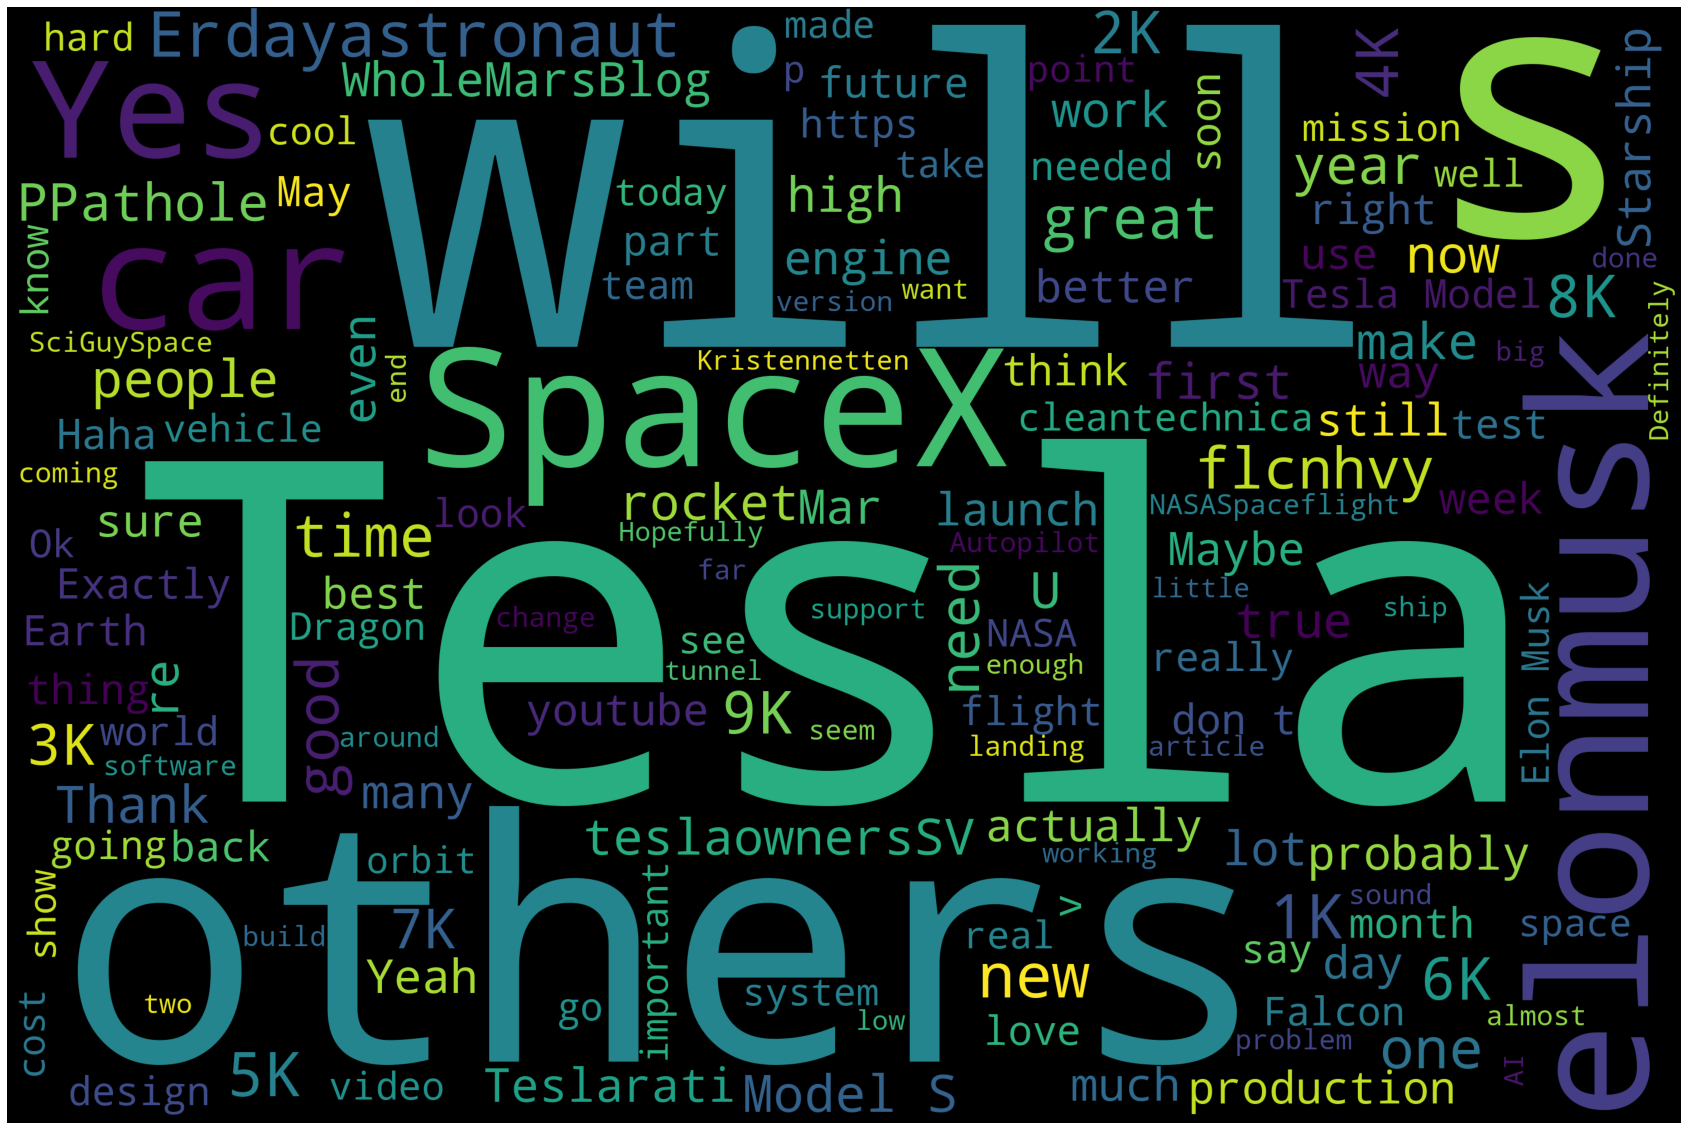

In [235]:
or_wordcloud = WordCloud(width=3000, height=2000, background_color='black',
                      max_words=150, stopwords=STOPWORDS).generate(or_tweets_text)
plot_cloud(or_wordcloud)

<h2>name types</h2>


In [236]:
block = nlp(clean_tweets)
spacy.displacy.render(block, style='ent', jupyter=True)


<h2>positive, negative and natrual tweets using df format</h2>


In [237]:
#clean tweets in df foramt using regex
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text)  
    text = re.sub(r"#", "", text) 
    text = re.sub(r"RT[\s]+", "", text)  
    text = re.sub(r"https?:\/\/\S+", "", text)  
    text = re.sub(r"((\d+\,*\d*)+\s*)+", "", text) #for elonmusk.csv
    text = re.sub(r"\n", "", text) #for elonmusk.csv
    

    return text
tweets_df["text"] = tweets_df["text"].apply(cleantext)


In [238]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])


tweets_df[["subjectivity", "polarity"]] = tweets_df.apply(
    sentiment_analysis, axis=1)


get the positive natrual and negative tweets

In [239]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

tweets_df["analysis"] = tweets_df["polarity"].apply(analysis)
tweets_df.head()


,text,subjectivity,polarity,analysis
0,"Please ignore prior tweets, as that was someon...",0.366667,0.166667,Positive
1,Went to Iceland on Sat to ride bumper cars on ...,0.733333,0.600000,Positive
2,I made the volume on the Model S go to . Now...,0.000000,0.000000,Neutral
3,"Great Voltaire quote, arguably better than Twa...",0.780000,0.450000,Positive
4,That was a total non sequitur btw,0.750000,0.000000,Neutral


In [240]:
positive_tweets = tweets_df[tweets_df['analysis'] == 'Positive']
negative_tweets = tweets_df[tweets_df['analysis'] == 'Negative']
neutral_tweets = tweets_df[tweets_df['analysis'] == 'Neutral']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['text'])

print('neutral tweets')
for i, row in neutral_tweets[:5].iterrows():
    print(' -' + row['text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['text'])


positive tweets
 -Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.
 -Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)
 -Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.
 -Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.
 -Yum! Even better than deep fried butter: 
neutral tweets
 -I made the volume on the Model S  go to .  Now I just need to work in a miniature Stonehenge...
 -That was a total non sequitur btw
 -His singing and acting talent will be sorely missed:  South Park sequel coming soon...youtube.comSo Roneryronery
 -Kanye stopped by the SpaceX rocket factory today..K
 -Met with UNICEF, Doctors Without Borders and Artists for Peace & Justice. I support them and would recommend others do too.
negative tweets
 -Got called randomly by Kanye West today an

calculate percntage of each sentiment

In [241]:
len_positive_tweets = len(positive_tweets)
len_negative_tweets = len(negative_tweets)
len_neutral_tweets = len(neutral_tweets)

print("positive percpercentage: ", (len_positive_tweets/len_tweets)*100)
print("negative percpercentage: ", (len_negative_tweets/len_tweets)*100)
print("neutral percpercentage: ", (len_neutral_tweets/len_tweets)*100)


positive percpercentage:  44.65836473865312
negative percpercentage:  12.805177781418974
neutral percpercentage:  42.536457479927904


Without processing data

In [242]:
original_tweets_df[["subjectivity", "polarity"]] = original_tweets_df.apply(
    sentiment_analysis, axis=1)

original_tweets_df["analysis"] = original_tweets_df["polarity"].apply(analysis)
tweets_df.head()


,text,subjectivity,polarity,analysis
0,"Please ignore prior tweets, as that was someon...",0.366667,0.166667,Positive
1,Went to Iceland on Sat to ride bumper cars on ...,0.733333,0.600000,Positive
2,I made the volume on the Model S go to . Now...,0.000000,0.000000,Neutral
3,"Great Voltaire quote, arguably better than Twa...",0.780000,0.450000,Positive
4,That was a total non sequitur btw,0.750000,0.000000,Neutral


In [243]:
original_positive_tweets = original_tweets_df[original_tweets_df['analysis'] == 'Positive']
original_negative_tweets = original_tweets_df[original_tweets_df['analysis'] == 'Negative']
original_neutral_tweets = original_tweets_df[original_tweets_df['analysis'] == 'Neutral']

print('positive tweets')
for i, row in original_positive_tweets[:5].iterrows():
    print(' -' + row['text'])

print('neutral tweets')
for i, row in original_neutral_tweets[:5].iterrows():
    print(' -' + row['text'])

print('negative tweets')
for i, row in original_negative_tweets[:5].iterrows():
    print(' -' + row['text'])

positive tweets
 -Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.
873
648
5,453
 -Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :)
30
24
188
 -Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.
23
30
44
 -Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.
18
18
80
 -Yum! Even better than deep fried butter: http://ow.ly/877EB
23
24
165
neutral tweets
 -I made the volume on the Model S http://ow.ly/i/mtD7 go to 11.  Now I just need to work in a miniature Stonehenge...
29
17
78
 -That was a total non sequitur btw
26
14
50
 -His singing and acting talent will be sorely missed:  http://youtube.com/watch?v=jdug6yHJB40&feature=related…
South Park sequel coming soon...
youtube.com
So Ronery
ronery
8
4
36
 -Kanye stopped by the SpaceX rocket factory today.
1,305
9,005
1

plot tweets sentiment

12206


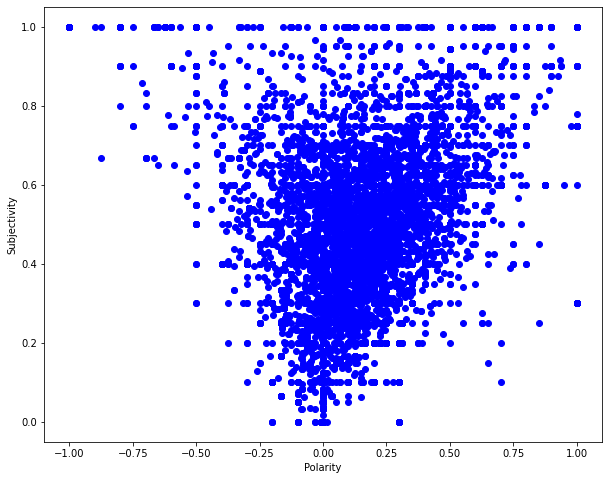

In [244]:

plt.figure(figsize=(10, 8))
print(tweets_df.shape[0])
for i in range(0, tweets_df.shape[0]):
    plt.scatter(tweets_df["polarity"][i],
                tweets_df["subjectivity"][i], color="Blue")

plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()
